In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv(r'C:\Users\mugok\Desktop\Data sets\Mall_Customers.csv') 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={"Age":"How_old"} ,inplace=True)

In [5]:
df.head()

,CustomerID,Gender,How_old,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={"How_old":"Age"} ,inplace=True)

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

To check whether the dataframe has a null value below

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dropping "CustomerID" column since it is not of interest for this analysis

In [12]:
df.drop(["CustomerID"] , axis=1 , inplace= True)

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Below are the analysis and visualizations of data.

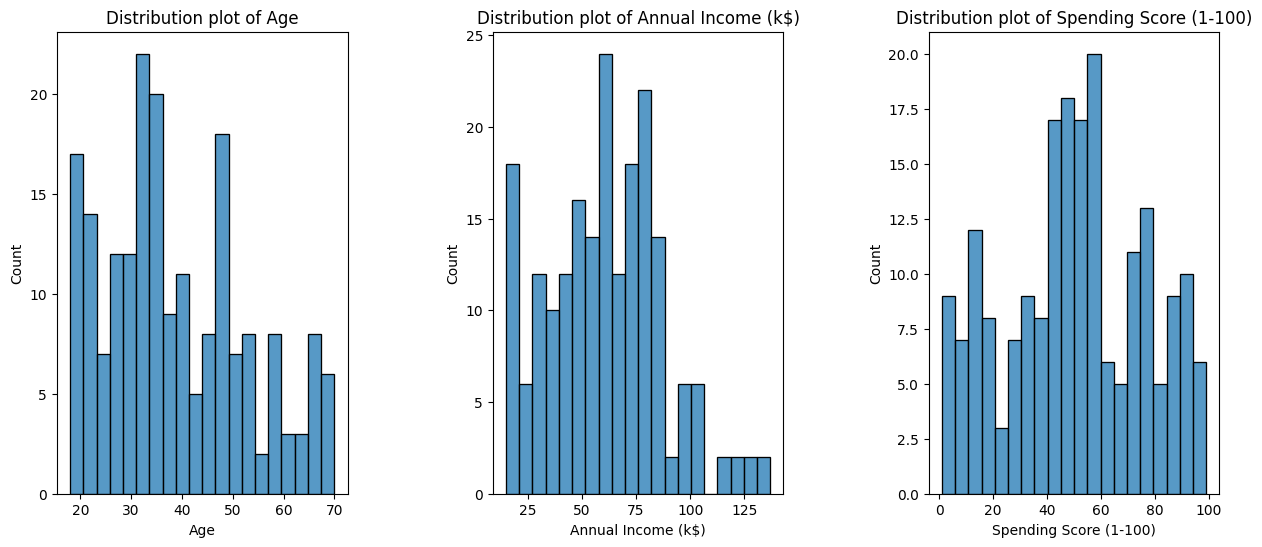

In [14]:
plt.figure(1 ,figsize=(15,6))
n = 0

for x in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5 , wspace= 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title("Distribution plot of {}".format(x))

plt.show()

Comparison between number of males and females 

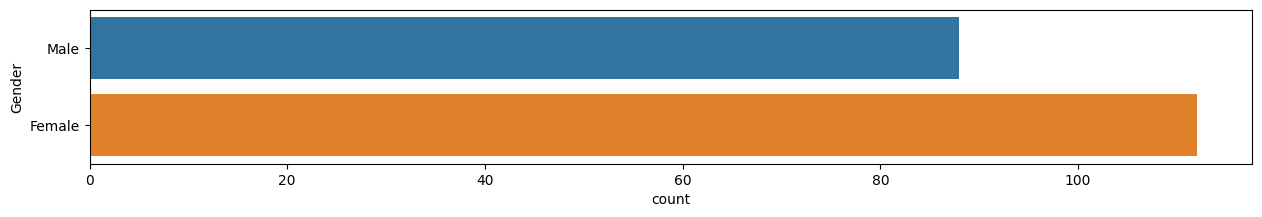

In [15]:
plt.figure(figsize=(15,2))
sns.countplot(y= "Gender" , data=df)
plt.show()

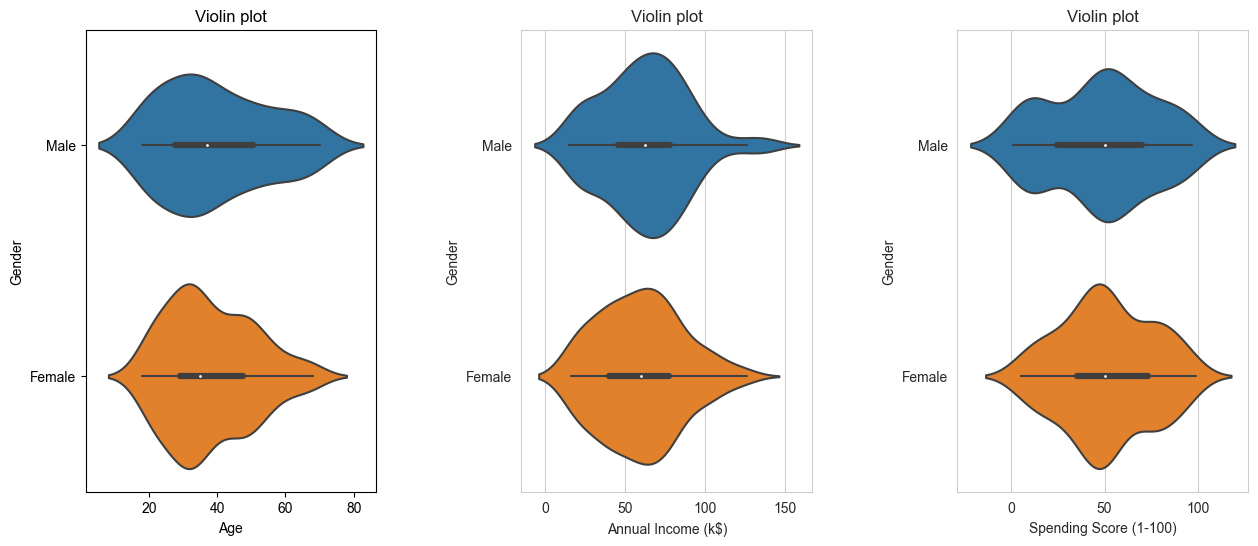

In [16]:
plt.figure(1 ,figsize=(15,6))
n = 0

for cols in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set_style('whitegrid')
    plt.subplots_adjust(hspace=0.5 , wspace= 0.5)
    sns.violinplot(x= cols , y = 'Gender' , data = df)
    plt.title("Violin plot")

plt.show()

Dividing age into different categories for better analysis and visualization. This is to understand the range with the highest number of customers.

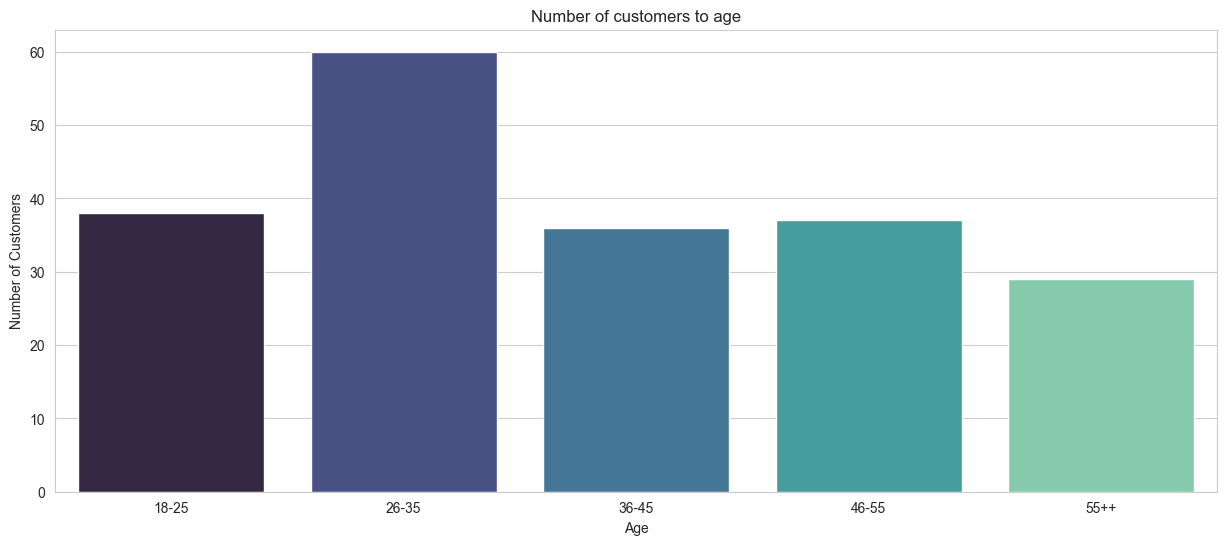

In [17]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55_above = df.Age[(df.Age > 55) ]

age_x = ["18-25","26-35","36-45","46-55","55++"]
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55_above.values)]


plt.figure(figsize=(15,6))

sns.set_style('whitegrid')
sns.barplot(x= age_x , y = age_y, palette='mako')
plt.title("Number of customers to age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

plt.show()

To understand the relationship between annual income and the spending score , we visualize below using a relation plot (relplot)

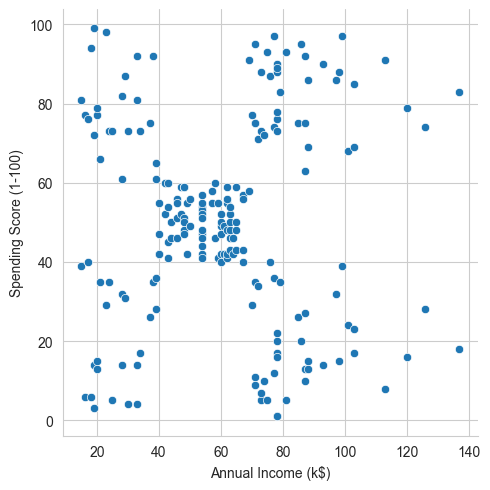

In [18]:
sns.relplot(x="Annual Income (k$)" , y= "Spending Score (1-100)" , data= df)
plt.show()

From above , annual income between 20-40 and 60-140 has no much relationship with the spending score ,
but the annual income between 40- 60 has a defined relationship that corresponds to a spending score of 40-60


Dividing the spending score the same as age .

ss= spending score

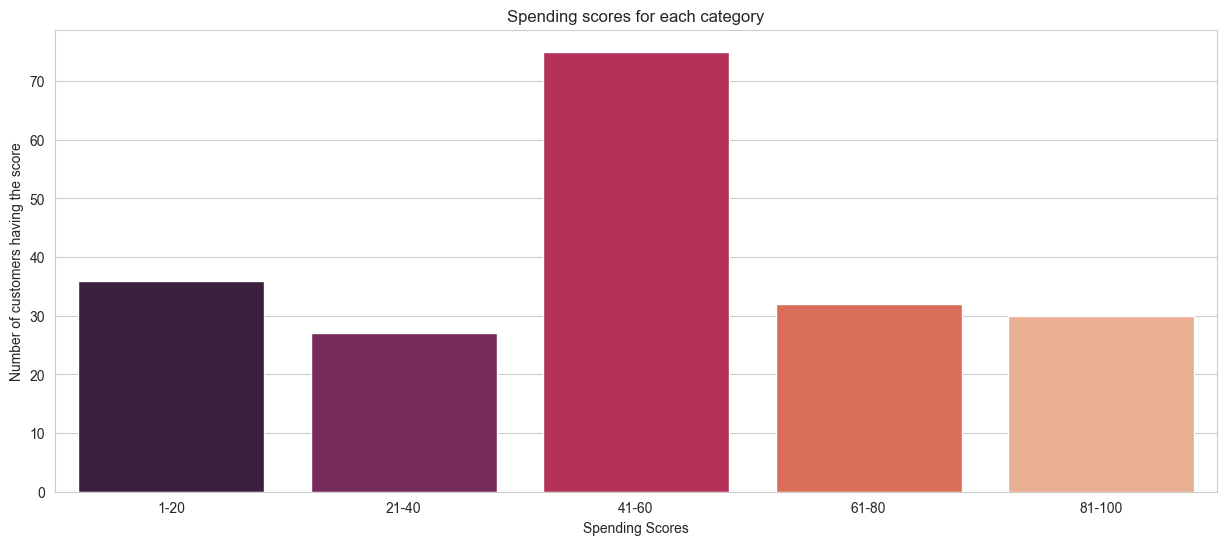

In [19]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ss_x = ["1-20","21-40","41-60","61-80","81-100"]
ss_y = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]


plt.figure(figsize=(15,6))

sns.set_style('whitegrid')
sns.barplot(x= ss_x , y = ss_y, palette='rocket')
plt.title("Spending scores for each category")
plt.xlabel("Spending Scores")
plt.ylabel("Number of customers having the score")

plt.show()

From above , the maximum number of customers have a spending score between 41-60.

Diving also the annual income and visualizing it.

A_income = Annual income.

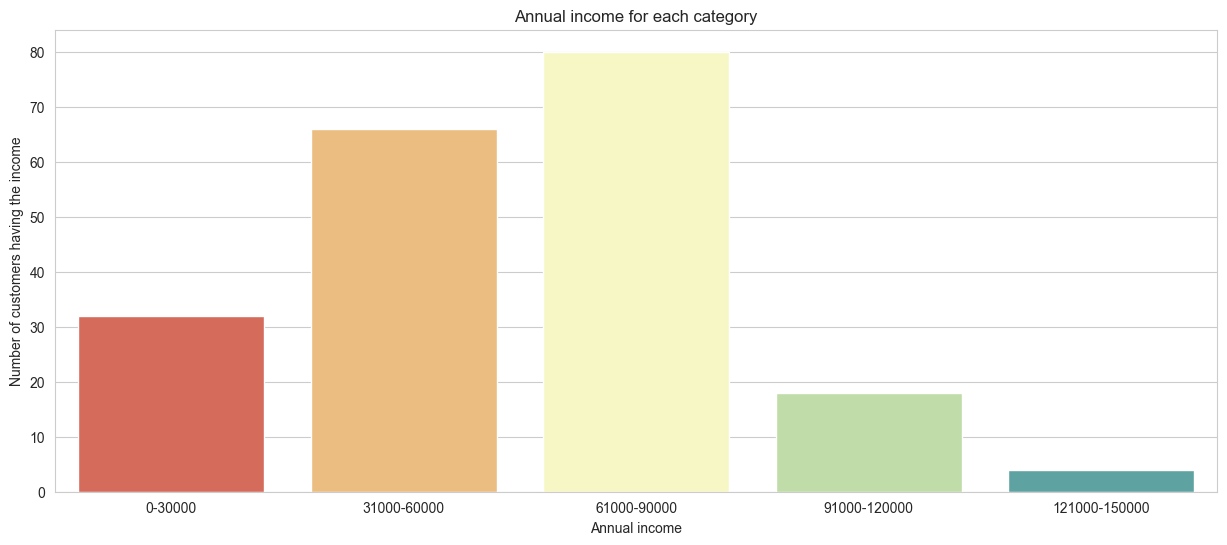

In [20]:
A_income_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 1) & (df["Annual Income (k$)"] <= 30)]
A_income_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
A_income_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
A_income_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
A_income_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]



A_income_x = ["0-30000","31000-60000","61000-90000","91000-120000","121000-150000"]
A_income_y = [len(A_income_0_30.values),len(A_income_31_60.values),len(A_income_61_90.values),len(A_income_91_120.values),len(A_income_121_150.values)]


plt.figure(figsize=(15,6))

sns.set_style('whitegrid')
sns.barplot(x= A_income_x , y = A_income_y, palette='Spectral')
plt.title("Annual income for each category")
plt.xlabel("Annual income")
plt.ylabel("Number of customers having the income")

plt.show()

From above , most of the customers earn between 61,000 - 90,000.

Data analysis and visualization done , start of clustering process using K-means algorithm.

We start clustering based on age and spending score.

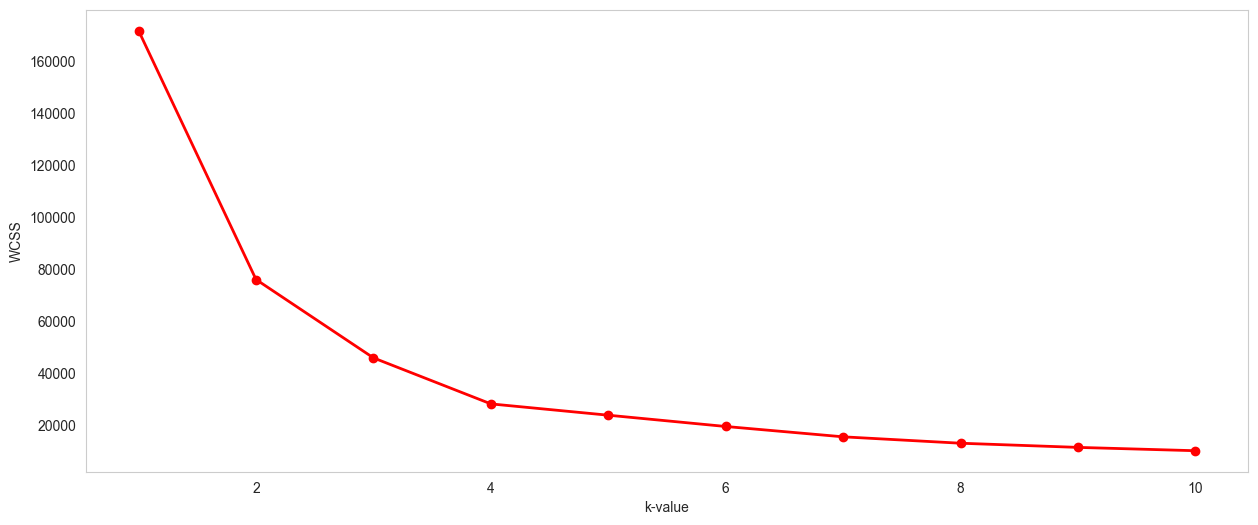

In [26]:
x1 = df.loc[: , ["Age" , "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2 , color = 'red' ,marker = "o")
plt.xlabel("k-value")
plt.ylabel("WCSS")
plt.show()

From the above , we can see that 4 is the optimum number of clusters.

In [28]:
#initialize the class object
kmeans = KMeans(n_clusters=4)

#predict the labels of clusters
label = kmeans.fit_predict(x1)

print(label)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [29]:
#check centroids
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


Visualize clusters in a graph

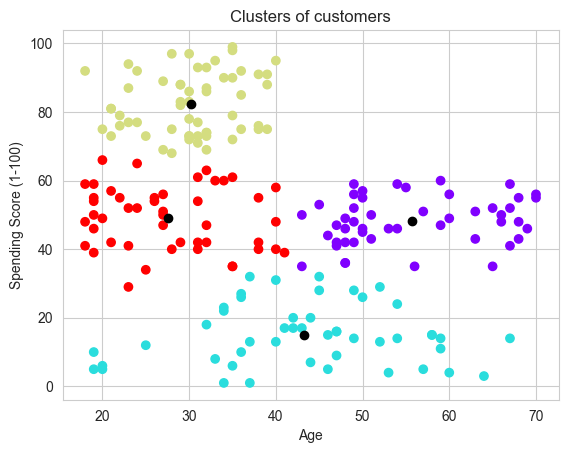

In [32]:
plt.scatter(x1[:,0],x1[:,1] , c= kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1] , color="Black")
plt.title("Clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

Similary , forming clusters based on annual income and spending scores .

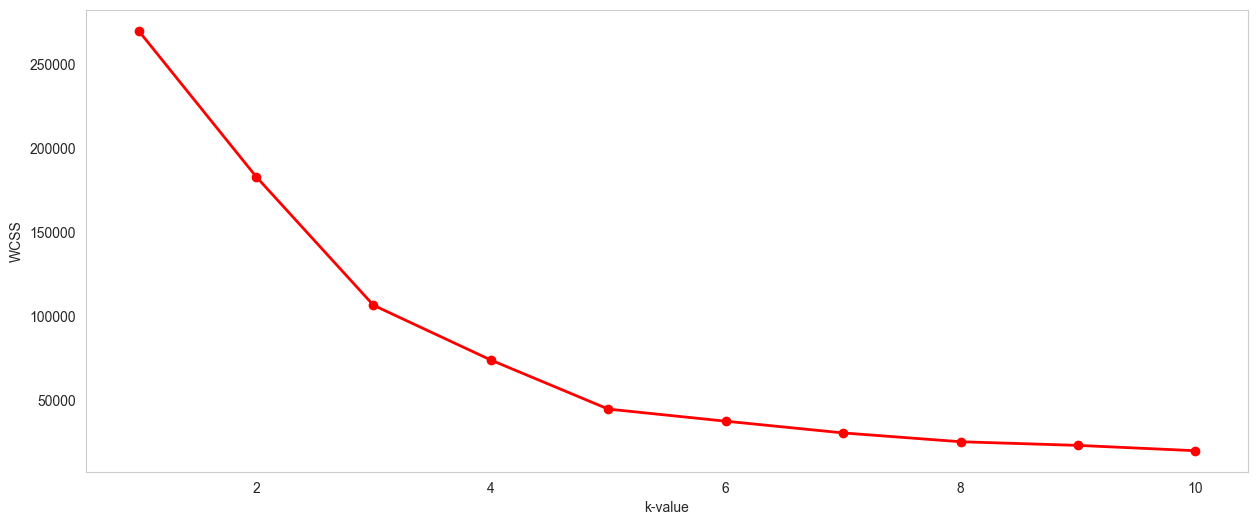

In [38]:
x2 = df.loc[: ,["Annual Income (k$)" , "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2 , color = 'red' ,marker = "o")
plt.xlabel("k-value")
plt.ylabel("WCSS")
plt.show()


From the above we can see the optimum number of clusters is around 5.

In [41]:
#initialize the class object
kmeans = KMeans(n_clusters=5)

#predict the labels of clusters
label = kmeans.fit_predict(x2)

print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [43]:
#check cluster centroids
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


Visualize clusters in a graph

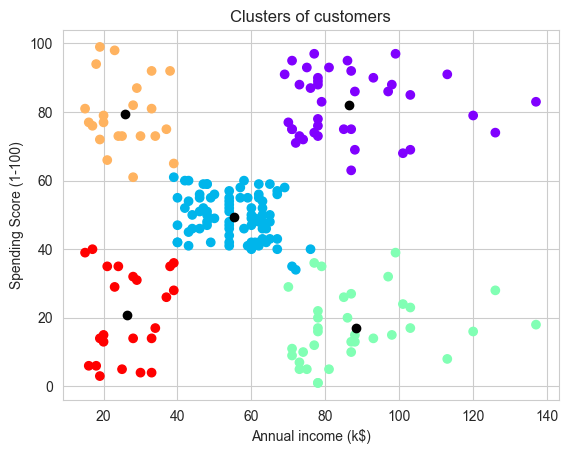

In [45]:
plt.scatter(x2[:,0],x2[:,1] , c= kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1] , color="Black")
plt.title("Clusters of customers")
plt.xlabel("Annual income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Forming clusters from all the three variables

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


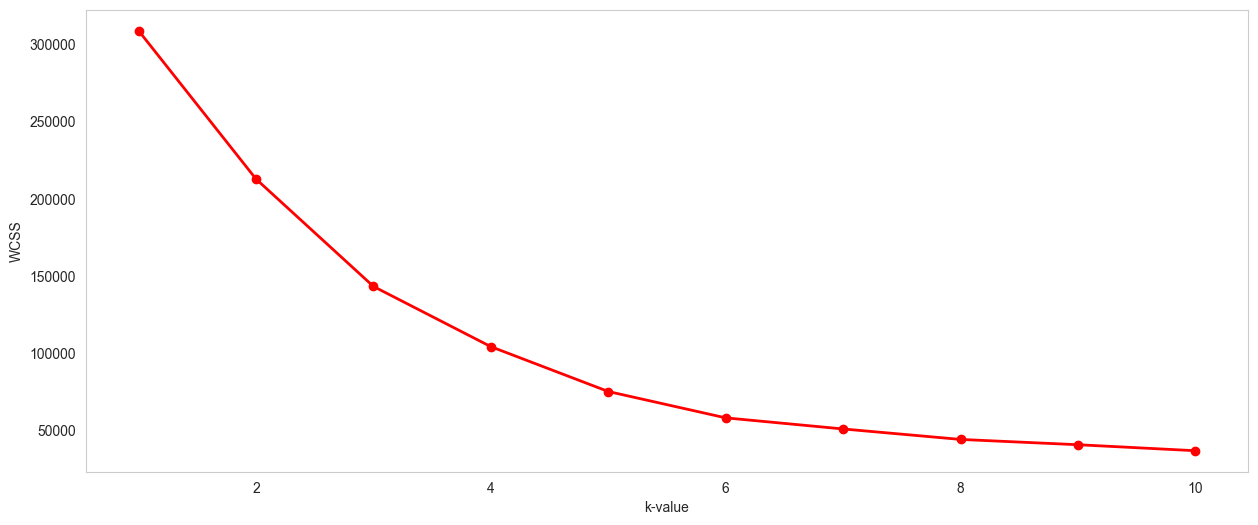

In [48]:
x3 = df.iloc[:,1:]
print(x3)

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth = 2 , color = 'red' ,marker = "o")
plt.xlabel("k-value")
plt.ylabel("WCSS")
plt.show()


From the above we can see that the optimum number of clusters is around 5 , there is no much change after 5.

In [49]:
#initialize the class object
kmeans = KMeans(n_clusters=5)

#predict the labels of clusters
label = kmeans.fit_predict(x3)

print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [50]:
#check for cluster centroids 
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.32432432 87.43243243 18.18918919]
 [43.93421053 55.21052632 49.44736842]
 [24.96       28.04       77.        ]]


Plotting the 3 variables in a 3D plot .

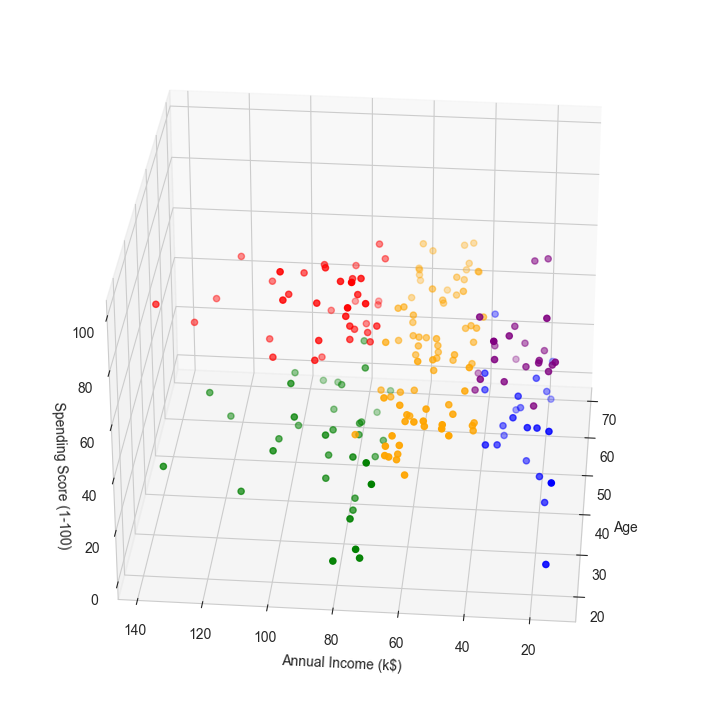

In [55]:
clusters = kmeans.fit_predict(x3)
df["label"] = clusters

df.head()

from mpl_toolkits.mplot3d import Axes3D
#Create a matplotlib figure 
fig = plt.figure(figsize=(18,9))
#Add a 3d subplot to the figure
ax = fig.add_subplot(111,projection='3d')

#scatter plot in 3D

ax.scatter(df["Age"][df.label == 0] , df["Annual Income (k$)"][df.label == 0] ,df["Spending Score (1-100)"][df.label == 0] , c='blue')
ax.scatter(df["Age"][df.label == 1] , df["Annual Income (k$)"][df.label == 1] ,df["Spending Score (1-100)"][df.label == 1] , c='red')
ax.scatter(df["Age"][df.label == 2] , df["Annual Income (k$)"][df.label == 2] ,df["Spending Score (1-100)"][df.label == 2] , c='green')
ax.scatter(df["Age"][df.label == 3] , df["Annual Income (k$)"][df.label == 3] ,df["Spending Score (1-100)"][df.label == 3] , c='orange')
ax.scatter(df["Age"][df.label == 4] , df["Annual Income (k$)"][df.label == 4] ,df["Spending Score (1-100)"][df.label == 4] , c='purple')

#set the view angles
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

From the above we have visualized the 5 clutsers of customers segmented in our entire dataset.